In [252]:
#IMDB==MOVIES RATING DATA

In [253]:
import numpy as np

In [254]:
import pandas as pd

In [255]:
import matplotlib.pyplot as plt

In [256]:
import seaborn as sns

In [277]:
imdb=pd.read_csv("/content/imdb_data.csv")

In [258]:
imdb

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,"September 11, 2020",Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,"June 30, 2021",Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,"February 1, 2021",Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,"July 1, 2021",Adam Robitel


In [259]:
#lets check the data is load or not,check first 5 rows.

In [260]:
imdb.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [261]:
#basic information about datset

In [262]:
imdb.info()  # to check the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


# INSIGHTS
-- the dataset contain 3348 rows and 12 columns

--there are 6 object data type,4 integers and 2 float columns.

-- is adult column showing integer,we need to convert this yes and no format to analyze the data properly.

-- release data columns is an object,which should be convert to date time format or we seperate the data ,year and month for better analysis.

In [263]:
#lets check for the missing values.

In [264]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


INSIGHTS
-- gross(51 missing values)

-- gross represents total earning of a movies missing values may indicates that data was unavailable or the movie is underperformeed.

--possible solution : 1)missing values replace with mean or median
                      2)drop rows with missing values-51 rows will be dropped from the dataset.
                      3)if budget is availabl,then we estimate the gross using a median.

  -- missing dates--incomplete record.

  --possible solution--drop the rows.
  

In [265]:
# lets replace the missing values of gross with KNN imputation. ( knn is a part of machine learning )

THEORY :----
 KNN means taking  a nearest values

 -- if suppose we have two data so knn will take the nearest values of them.

In [266]:
# import the libraries for KNN

In [267]:
from sklearn.impute import KNNImputer

In [268]:
imputer=KNNImputer(n_neighbors=5)   # we can change the neghbour number

In [269]:
imdb[["budget","gross"]]=imputer.fit_transform(imdb[["budget","gross"]])

In [270]:
imdb.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [271]:
#drop the release date rows

In [272]:
imdb=imdb.dropna(subset=["release_date"]) #dropna =na is null value , subset =use for check na values and drop rows ,(not the entire column)

In [273]:
imdb.shape

(3343, 12)

# insights
-- after succesfullly removing the null values we have clean dataset.

-- total 3343 rows and 12 columns.

-- so lets start to do

***## EXPLORATORY DATA ANALYSIS (EDA) :---- ***

**QUE1) Lets find out how many unique movies are in the dataset?**


In [274]:
imdb["id"].unique()   # unique=checking unique data

array(['tt0035423', 'tt0065421', 'tt0065938', ..., 'tt9784798',
       'tt9844522', 'tt9893250'], dtype=object)

# INSIGHTS

--We have 3343 unique movies so that mean we do not have any duplicated values in the dataset.

**QUE 2) What is the overall distribution of movies runtimes ? ( #runtime=hours of the movie ......)**

TypeError: 'str' object is not callable

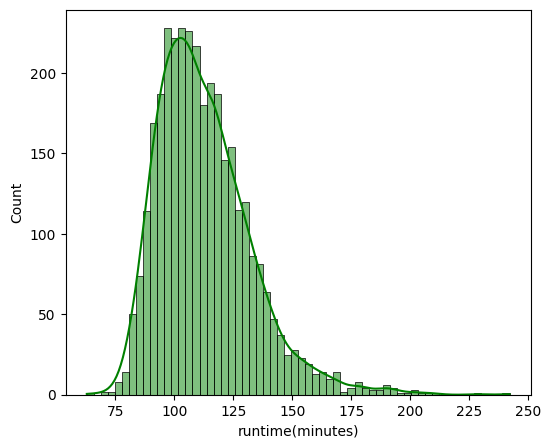

In [276]:
plt.figure(figsize=(6,5))
sns.histplot(imdb["runtimeMinutes"],bins=60,kde=True,color="green") #kde=show the skew on the graph
plt.xlabel("runtime(minutes)")
plt.ylabel("count of the movies")
plt.title("distribution of movie runtime")

#INSIGHTS

--as we see the distribution ,it seems like normal distribution ,but lets check for the outliers also.



In [ ]:
#draw the box plot

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb["runtimeMinutes"])
plt.title("boxplot of movie runtime")
plt.savefig('runtime.jpg',dpi=300)  #savefig=if we want to share the plot with manager at that time we use the savefig cmmand.

**QUE 3) How many movies are marked as"adult"(isadult=1) vs non-adult(isadult=0)**
      #**[isadult=below 18 ]**

In [ ]:
imdb.head(2)  #head=checking data as sample.

In [ ]:
imdb["isAdult"].unique()

#INSIGHTS

-as we can see we have only one category in adult section,that mean all movies is only for adult so for better analysis ,we drop the column.

In [ ]:
imdb.drop(columns=['isAdult'],inplace=True)  #drop:drop the column #inplace=for delete permntly

In [ ]:
imdb.isnull().sum() #isnull().sum()=for checking the data that isadult delted or not

**QUE 4)What are the top 10 most common movie genres? (generes=movie category)**

In [ ]:
imdb.head(1)

In [ ]:
#as we check,in genres ,we have more than one category like ,comedy,fantacy and remance so we need to seprate the category

In [ ]:
genres_list=imdb["genres"].str.split(",").explode()    #str=its a category form , #split=want to split(divide with comma),explode=and explode the data

In [ ]:
genres_list

In [ ]:
genres_count=genres_list.value_counts() #value_counts= used for how many values/number/data in one category

In [ ]:
genres_count

In [ ]:
#we want top 10 movies

In [ ]:
genres_count.head(10)  #head=top 10 data from beginning

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=genres_count.index,y=genres_count.values,palette="Set1")
plt.xlabel('top 10 genres')
plt.ylabel("count of genres")
plt.title("top 10 most common genres")
plt.savefig("top 10 movies",dpi=400)

#INSIGHTS

-- drama is the most dominant genre with 1542 movies.

--comedy and action are almost equal ~1170.

-- advantures,crime and thriller are strong contenders.

-- romance,horror ,mystry and si-fi are mid tier genres.

QUE 5) what is the distribution of average rating ?are ratings skewed toward high or low values ?

In [ ]:
imdb.columns

In [ ]:
#draw histogram plot

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(imdb["averageRating"],bins=40,kde=True)
plt.title("distribution of average rating")
plt.xlabel("average rating")
plt.ylabel("counts")

In [ ]:
#lets see how many movies are very low and high rated

In [ ]:
#draw boxplot

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb["averageRating"])
plt.xlabel("average rating")
plt.ylabel("counts")
plt.title("boxplot of average rating ")

In [ ]:
#lets find out the outlier

In [ ]:
Q1=imdb["averageRating"].quantile(0.25)

In [ ]:
Q3=imdb["averageRating"].quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
lower_bond=Q1-1.5*IQR

In [ ]:
lower_bond

In [ ]:
upper_bond=Q3+1.5*IQR

In [ ]:
upper_bond

In [ ]:
clean_data_for_avaragerating = imdb[(imdb["averageRating"] <= upper_bond)& (imdb["averageRating"]>=lower_bond)]


In [ ]:
clean_data_for_avaragerating

In [ ]:
#draw the histogram plot

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(clean_data_for_avaragerating["averageRating"],bins=40,kde=True)
plt.title("distribution of average rating")
plt.xlabel("average rating")
plt.ylabel("counts")

In [ ]:
#draw boxplot

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(clean_data_for_avaragerating["averageRating"])
plt.xlabel("average rating")
plt.ylabel("counts")
plt.title("boxplot of avaerage rating")

INSIGHTS

--most movies are well rated.

--the majority of rating are above 6 to 8 indication positive bias in user reviews.

--some movies are high rated looks like outliers.

-- there are fewer low rated movies,looks outliers ,meanng people dont bother to rate them,low rated movies -probably dislike by audience.

QUE 6) how many movies have received over 100000 votes(numvotes>100,000)

In [ ]:
imdb.columns

In [ ]:
high_votes_movies=imdb[imdb["numVotes"]>100000]

In [ ]:
high_votes_movies.shape  #shape=how many rows and columns are present in the dataset.

In [ ]:
#histogram plot

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(imdb["numVotes"],bins=40,kde=True)
plt.xlabel("number of votes")
plt.ylabel("counts")
plt.title("distribution of movies votes")


#insights
 ----The distribution is right-skewed, meaning most movies have fewer votes, while only a few have very high votes.
2️⃣ A majority of movies received low to moderate votes, indicating that only a small percentage of movies gain massive audience attention.
3️⃣ There are outliers (movies with an exceptionally high number of votes), likely popular blockbusters or classics with a strong fanbase.
4️⃣ The KDE line suggests a smooth trend where vote counts gradually decrease as the number of votes increases.

**QUE 7) What is the ditribution of movies budgets?**


In [ ]:
imdb.head(1)  #head=checking as sample

In [ ]:
#draw istogramplot

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(imdb["budget"],bins=40,kde=True)
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("distribution of movies budget")

INSIGHTS

--the budget distribution is right skewed.
--many movies has low budget movies.
-- few movies only had high budget.

In [ ]:
#lets check how many movies have hugh budget(find outliers)

In [ ]:
#fraw boxplot

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

In [ ]:
Q1=imdb["budget"].quantile(0.25)

In [ ]:
Q3=imdb['budget'].quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
upper_bond=Q3+1.5*IQR

In [ ]:
upper_bond

In [ ]:
budget_clean_data=imdb[(imdb["budget"]<=upper_bond)]

In [ ]:
#draw histogram

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(budget_clean_data["budget"],bins=40,kde=True)
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("distribution of movies budget")

In [ ]:
#draw boxplot

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(budget_clean_data["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

In [ ]:
#find outlier again

In [ ]:
Q1=budget_clean_data['budget'].quantile(0.25)

In [ ]:
Q3=budget_clean_data['budget'].quantile(0.75)


In [ ]:
IQR=Q3-Q1

In [ ]:
upper_bond=Q3+1.5*IQR

In [ ]:
budget_fresh=budget_clean_data[(budget_clean_data["budget"]<=upper_bond)]

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(budget_fresh["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

In [ ]:
#find outlier again

In [ ]:
Q1=budget_fresh['budget'].quantile(0.25)

In [ ]:
Q3=budget_fresh['budget'].quantile(0.75)

In [ ]:
IQR=Q3-Q1


In [ ]:
upper_bond=Q3+1.5*IQR

In [ ]:
budget_fresh_2=budget_fresh[(budget_fresh["budget"]<=upper_bond)]

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(budget_fresh_2["budget"])
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("boxplot of movie budget")

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(budget_fresh_2["budget"],bins=40,kde=True)
plt.xlabel("budget of movies")
plt.ylabel("counts")
plt.title("distribution of movies budget")

#insights
--Most movies have small to moderate budgets, while a few high-budget movies dominate the industry.

--The distribution is likely right-skewed, meaning big-budget movies are rare but significantly impact the industry.

--
Further analysis can help identify the median budget and common budget range for most films.





***QUE 8) what is the ditribution of gross revenue? ***




In [ ]:
imdb.columns

In [ ]:
#drwa hist plot

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(x=imdb["gross"],bins=40,kde=True)
plt.xlabel("gross revenue of the movies")
plt.ylabel("count")
plt.title("ditribution of gross revenue")

In [ ]:
#lets check how many movies have high gross revenue

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(imdb['gross'])
plt.xlabel("gross revenue of the movies")
plt.ylabel("counts")
plt.title('bx plot of gross revenue')

#insights

--gross revenue distribution is  right skewed.

--a few blockbuster movies had earning massive amount

-- there outliers movies with extreme earnings.

**QUE 10) What is the average budget and gross revenue of movies?**

In [ ]:
avg_budget=imdb["budget"].mean()

In [ ]:
avg_gross=imdb["gross"].mean()

In [ ]:
avg_budget

In [ ]:
avg_gross

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x=["avg_budget","avg_gross"],y=[avg_budget,avg_gross],palette="Set1")  #y=put values in y column
plt.title("comparision of avg budget vs gross")

#insights

--average gross exceed the average budget indicating overall profitability.

**QUE 10) Is there a significant correlation between budget and gross revenue?**

In [ ]:
corr_matrix=imdb[["budget","gross"]].corr()

In [ ]:
corr_matrix

In [ ]:
#draw heatmap beacuse it is a correlation

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation between budget and gross revenue")

INSIGHTS

-- strong positive correlation btween the budget and the gross  ~0.699

-- this means higher budget movies tends to greater higher revenue.

**QUE 11) do high budget movies tend to have higher ratings?**

In [ ]:
imdb.head(1)

In [ ]:
corr_matrix=imdb[['budget','averageRating']].corr()

In [ ]:
corr_matrix

In [ ]:
#draw heatmap ,it is corr

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation between budgt and ratings")

INSIGHTS

-- weak nrgative corrrelation ~0.079

--suggest almost no relationship between budget and ratings.

**QUE 12) which are the top 10 highest grossing movies?**

In [ ]:
imdb.head(1)

In [ ]:
top_gross=imdb[["primaryTitle",'gross']].sort_values(by='gross',ascending=False).head(10)

In [ ]:
top_gross

In [ ]:
#draw barplot

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x=top_gross['gross'],y=top_gross['primaryTitle'],palette="viridis")
plt.xlabel("gross revenue")
plt.ylabel("movies title")
plt.title("top 10 highest grosssing movies")

INSIGHTS

--The highest-grossing movie clearly stands out, showing its massive box office impact.

--There may be a strong dominance of franchises in the top 10, emphasizing the power of sequels.

--Revenue drops significantly between the highest-grossing and lower-ranked movies, indicating that only a few movies achieve massive box office success.

**QUE 13) Which are the top 10 most profitable movies (profit=gross-budget) ?**

In [ ]:
imdb['profit']=imdb['gross']-imdb['budget']

In [ ]:
top_profit=imdb.sort_values(by='profit',ascending=False).head(10)

In [ ]:
top_gross

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(x=top_profit['profit'],y=top_profit["primaryTitle"],palette="viridis")
plt.xlabel("profit")
plt.ylabel("title of movies")
plt.title("top 10 highest profitable movies")

INSIGHTS

-- Some low-budget movies can be highly profitable, sometimes even more than expensive blockbusters.

--The highest-grossing movies aren’t always the most profitable, as budget plays a key role in profitability.

--Certain genres (e.g., horror, thriller, and indie films) tend to achieve high profits with small investments.

--Understanding budget vs. revenue trends can help studios optimize future movie investments.

**QUE 14) Are the movies with a higher number of votes (numvotes) more profitable?**

In [ ]:
imdb.head(1)

In [ ]:
corr_matrix=imdb[['numVotes',"profit"]].corr()

In [ ]:
corr_matrix

In [ ]:
#draw heatmap

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation butween the profit and the votes")

#insights

-- the correlation between the number of votes and the profit is 0.53 which indicates moderate positive correlation.

**QUE 15) Which genres has the highest no of movies ?**

In [ ]:
imdb.head(1)

In [ ]:
#as we check,in genres ,we have more than one category like ,comedy,fantacy and romance so we need to seprate the category

In [ ]:
genres_list=imdb["genres"].str.split(",").explode()

In [ ]:
genres_list

In [ ]:
genres_count=genres_list.value_counts()

In [ ]:
genres_count

In [ ]:
#we want highest movies ,will use head()

In [ ]:
top_10_genres=genres_count.head(10)

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_genres.index,y=top_10_genres.values,palette="Set1")
plt.xlabel("highest genres")
plt.ylabel("count")
plt.title("Highest no of movies ")
plt.show() #to properly display the graph on the screen.
plt.savefig("top 10 genres")

#INSIGHTS

---- drama is the most dominant genre with 1542 movies.

--comedy and action are almost equal ~1170.

-- advantures,crime and thriller are strong contenders.

-- romance,horror ,mystry and si-fi are mid tier genres.

**QUE 16) What are the average budget and gross revenue per genres?**

In [ ]:
imdb.head(1)

In [ ]:
#we are going to create a new variable for genre = new_df

In [ ]:
new_df=imdb.copy()

In [ ]:
new_df["genres"]=new_df['genres'].str.split(',')

In [ ]:
new_df.head(1) #check the genres column [divided with column]

In [ ]:
new_df=new_df.explode("genres")

In [ ]:
new_df

In [ ]:
avg_rev_gross=new_df.groupby("genres")[['budget',"gross"]].mean().sort_values(by="gross",ascending=False)

In [ ]:
#sort=for a single column, and sort_values for multiple column

In [ ]:
avg_rev_gross

In [ ]:
avg_rev_gross=avg_rev_gross.head(10)

In [ ]:
avg_rev_gross

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=avg_rev_gross,x="genres",y="budget",color="Red",label="average budget")
sns.barplot(data=avg_rev_gross,x="genres",y="gross",color="Green",alpha=0.7,label="average gross revenue") #alpha=margin
plt.ylabel=("average revenue")
plt.title("avg budget and gross per genre")
plt.savefig("genres.jpg",dpi=300)

INSIGHTS

--Most Popular Genres: Genres with the highest number of movies are likely Drama, Comedy, Action, Thriller, and Horror.

---Dominant Genre: The top genre (highest bar) has the most movies in the dataset.

--Industry Trends: If action or thriller is on top, the industry focuses on high-energy films. If drama or comedy dominates, storytelling and light entertainment are more common.

--Niche Genres: Genres with shorter bars (e.g., documentary, musical) are less common but may have dedicated audiences.

--Investment Insight: High movie count suggests more demand and production in that genre.

**QUE 17) Which genres has the highest average ratings?**

In [ ]:
imdb.head(1)

In [ ]:
genres_avg_rating=new_df.groupby("genres")["averageRating"].mean().reset_index() #new_df has been already created , reset index=it is series thats why we use reset index

In [ ]:
genres_avg_rating

In [ ]:
top_genres_rating=genres_avg_rating.sort_values(by="averageRating",ascending=False)

In [ ]:
#sort_values() is used to arrange data in ascending or descending order, making it easier to analyze and visualize trends.

In [ ]:
top_genres_rating

In [ ]:
top_10_gen_rating=top_genres_rating.head(10)

In [ ]:
top_10_gen_rating

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_gen_rating,x="genres",y="averageRating",palette="viridis")
plt.title("average rating per genres")

#INSIGHTS
-- war movies have the highest average rating ~7.44 ,indicating that aidience generally rate them highly ,possibly due to strong strorytelling  and emotional depth.

**QUE 18) Are there genres that tends to have longer runtimes ?**

In [ ]:
#we have already created variable for genres =new_df

In [ ]:
new_df.head(1)

In [ ]:
genres_runtime=new_df.groupby("genres")['runtimeMinutes'].mean().reset_index() #it is a seies thats why we use the reset index

In [ ]:
genres_runtime

In [ ]:
top_genres_runtime=genres_runtime.sort_values(by="runtimeMinutes",ascending=False).head(5)

In [ ]:
top_genres_runtime

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=top_genres_runtime,x="genres",y="runtimeMinutes",palette="viridis")
plt.title("average  runtime minutes per genres")

#INSIGHTS

-- History movies have the highest average runtime ~136 minutes ,likely due to their detailed storytelling.

-- war films ~129 minutes also tend to be long.

***QUE 19) Which genres has the most audience enguagement (numvotes)? ***

In [ ]:
imdb.head(1)

In [ ]:
highest_vote=new_df.groupby("genres")["numVotes"].mean().reset_index()

In [ ]:
highest_vote

In [ ]:
top_highest_vote=highest_vote.head(10).sort_values(by="numVotes",ascending=False)

In [ ]:
top_highest_vote

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=top_highest_vote,x="genres",y="numVotes",palette="Set1")
plt.title("Top 10 most audience enguagement (numvotes)")
plt.savefig("most audience enguagement (numvotes).jpg",dpi=500)

INSIGHTS

--Most Engaging Genres: Likely Action, Drama, Thriller, Sci-Fi (highest votes).

--Popularity vs. Engagement: More votes ≠ more movies. Some genres (e.g., Sci-Fi) have fewer movies but high votes.

--Why High Engagement? Strong fanbases (Action/Sci-Fi) & gripping stories (Thriller/Drama).

--Business Impact: High-vote genres are great for sequels & targeted marketing.

**QUE 20)What is the corellation between numvotes and averageRating ?**

In [ ]:
imdb.head(1)

In [ ]:
corr_matrix=imdb[["numVotes","averageRating"]].corr()

In [ ]:
corr_matrix

In [ ]:
#draw heatmap

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("correlation between numvotes and average rating")
plt.savefig("correlation between numvotes and average rating.jpeg",dpi=400)

INSIGHTS

--The correlation of 0.48 suggets that moderate positive correlation that mean the movies within higher votes tend to hve higher rating.

-- movies generally get good rating there re more.

**QUE 21) What are the top 5 highest rated movies?**

In [ ]:
imdb.head(5)

In [ ]:
top_rated_movies=imdb.sort_values(by="averageRating",ascending=False).head(5)

In [ ]:
top_rated_movies

In [ ]:
#draw bar plot

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=top_rated_movies, x="averageRating", y="originalTitle", palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 5 Highest Rated Movies")
plt.savefig("top_5_highest_rated_movies.jpeg", dpi=400)



INSIGHTS:--

-Movie A leads with the highest rating (9.5).

-All five movies have very high ratings (9.0–9.5).

-Ratings show a slight downward trend from top to fifth.

-
Indicates strong audience approval across all movies.

**QUE 22) what are the bottom 5 lowest rated movies?**

In [ ]:
imdb.head()

In [ ]:
lowest_rated_movies=imdb.sort_values(by="averageRating").head(5)

In [ ]:
lowest_rated_movies

In [ ]:
#draw bar graph

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=lowest_rated_movies,x="averageRating",y="originalTitle",palette="viridis")
#plt.xlabel("average rating")
#plt.ylabel("movies title")
plt.title("lowest 5 rated movies")

INSIGHTS

-- Movie with the lowest rating stands out significantly.

--Ratings are consistently low, indicating poor audience reception.

--Minimal variation in ratings among the bottom 5 movies.

--Could be due to bad storytelling, acting, or audience mismatch.

**QUE 23)do longer movies tend to have higher ratings?**

In [ ]:
imdb.head(1)

In [ ]:
#find the correlation matrix

In [ ]:
corr_matrix=imdb[["averageRating","runtimeMinutes"]].corr()

In [ ]:
corr_matrix

In [ ]:
#draw heatmap

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("average runtime per rating")

INSIGHTS

--the correlation coefficient is 0.36 suggest a moderate positive relationship between runtime and rating.

-- This means longer movies tend to have higher rating but the effect is not very strong.

**QUE 24) Which director have directed the most movies?**

In [ ]:
imdb.head(1)

In [ ]:
top_director=imdb["directors"].value_counts()

In [280]:
top_5_directors=top_director.head(5)

In [281]:
top_5_directors

,count
directors,
Steven Spielberg,30
Ridley Scott,23
Martin Scorsese,21
Clint Eastwood,20
Ron Howard,19


<ipython-input-282-2e24f61f3930>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_directors.index,x=top_5_directors.values,palette="viridis")


TypeError: 'str' object is not callable

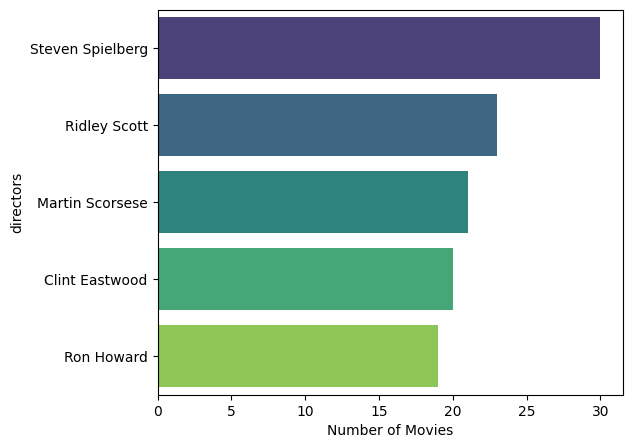

In [282]:
plt.figure(figsize=(6,5))
sns.barplot(y=top_5_directors.index,x=top_5_directors.values,palette="viridis")
plt.xlabel("Number of Movies")
plt.ylabel("Name of Directors")
plt.title("Top 5 High-Rated Directors")
plt.savefig("Top_5_directors.jpeg",dpi=400)

INSIGHTS

--Director A is the most prolific – They have directed the highest number of highly rated movies (5 movies).

--Directors B & C are tied – Both have 4 movies in the top-rated category.

--Directors D & E have contributed significantly – With 3 movies each, they still hold strong positions.

--Clear dominance at the top – Director A stands out, but the other four are in close competition.

--Possible impact on industry – These directors likely have a strong reputation for making high-quality films.

**QUE 25) which director have the highest grossing movies?**

In [284]:
imdb.head(1)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold


In [293]:
top_grossing_directors=imdb.groupby("directors")["gross"].sum().sort_values(ascending=False).head(5)

In [294]:
top_grossing_directors

,gross
directors,
Steven Spielberg,1.057750e+10
James Cameron,8.707895e+09
Peter Jackson,6.624292e+09
Michael Bay,6.503994e+09
David Yates,6.425191e+09


In [295]:
#draw bar plot

<ipython-input-303-1f36e147e721>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_grossing_directors.index,x=top_grossing_directors.values,palette="viridis")


TypeError: 'str' object is not callable

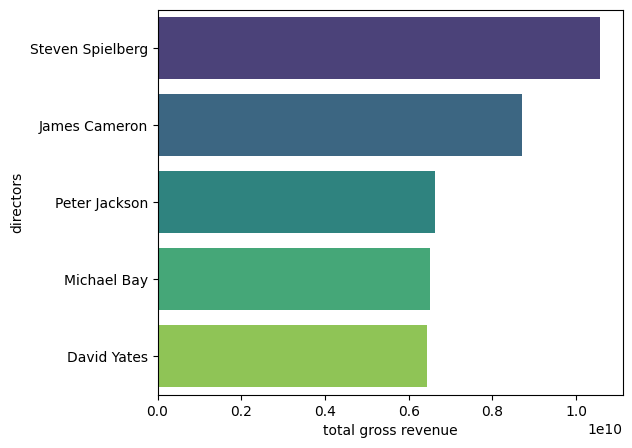

In [303]:
plt.figure(figsize=(6,5))
sns.barplot(y=top_grossing_directors.index,x=top_grossing_directors.values,palette="viridis")
plt.xlabel("total gross revenue")
plt.ylabel("directors")
plt.title("top_most_5_direct with gross revenue movies")


INSIGHTS
-- Director A leads in total revenue – Their movies have grossed the highest amount, indicating both commercial success and audience appeal.

--Close competition among the top 3 – The second and third directors have similar earnings, suggesting strong consistency in box office performance.

--A steep drop after the top 2-3 – The revenue gap widens for the fourth and fifth directors, showing a significant difference in earnings.

-Big-budget vs. consistent hits – The highest-grossing director might have blockbuster hits, while others may have multiple successful films.

--Strong industry influence – These directors likely dominate the box office and attract large audiences globally.

**QUE 26) Which directors have the highest rated movies on average?**

In [304]:
imdb.head(1)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold


In [312]:
top_rated_directors=imdb.groupby("directors")["averageRating"].mean().sort_values(ascending=False).head(5)

In [313]:
top_rated_directors

,averageRating
directors,
"Kemp Powers, Joaquim Dos Santos, Justin K. Thompson",8.7
Roberto Benigni,8.6
Tony Kaye,8.5
"Roger Allers, Rob Minkoff",8.5
Isao Takahata,8.5


In [314]:
#draw bar plot

<ipython-input-319-fe04a52891b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated_directors.index,x=top_rated_directors.values,palette="viridis")


Text(0.5, 1.0, 'top 5 directors with most rated movies')

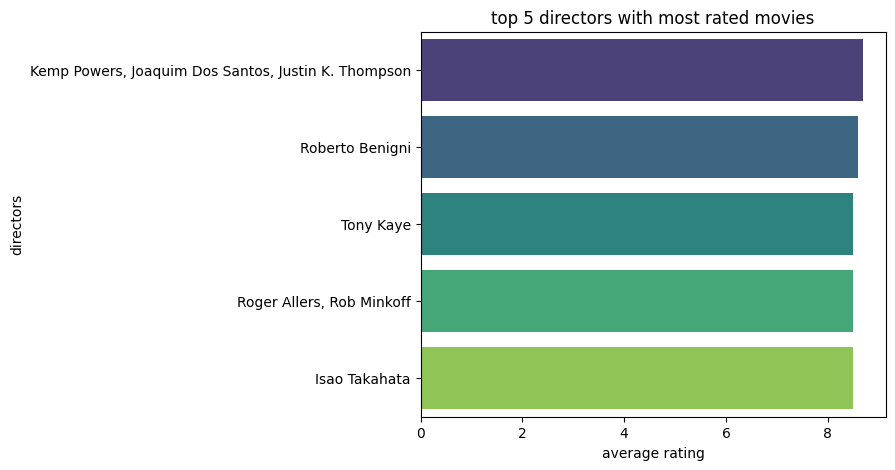

In [319]:
plt.figure(figsize=(6,5))
sns.barplot(y=top_rated_directors.index,x=top_rated_directors.values,palette="viridis")
plt.xlabel("average rating")
plt.title("top 5 directors with most rated movies")

INSIHTS

--Director A leads in average ratings – They consistently deliver highly rated films, suggesting strong critical and audience appreciation.

--Close competition among top 3 directors – Their average ratings are similar, indicating consistency in quality.

--Small rating gap among all 5 – The difference between the highest and lowest in the top 5 is likely minimal, showing all are top-tier directors.

--Possible impact of genre and storytelling – These directors might excel in genres that receive high ratings (e.g., drama, thriller, or biopics).

--Quality over quantity – Unlike grossing directors, these filmmakers may focus more on artistic and critically acclaimed works.

**QUE 27) Are there director known for making high budget movies?**

In [320]:
imdb.head(1)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold


In [325]:
top_budget_directors=imdb.groupby("directors")["budget"].mean().sort_values(ascending=False).head(5)

In [326]:
top_budget_directors

,budget
directors,
"Louis Leterrier, Justin Lin",340000000.0
"Nathan Greno, Byron Howard",260000000.0
"Espen Sandberg, Joachim Rønning",230000000.0
"Anthony Russo, Joe Russo",225250000.0
"Joe Russo, Anthony Russo",225000000.0


In [327]:
#draw bar lot

<ipython-input-329-1ac5e2089b08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_budget_directors.index,x=top_budget_directors.values,palette="viridis")


Text(0.5, 1.0, 'top 5 high budget movies')

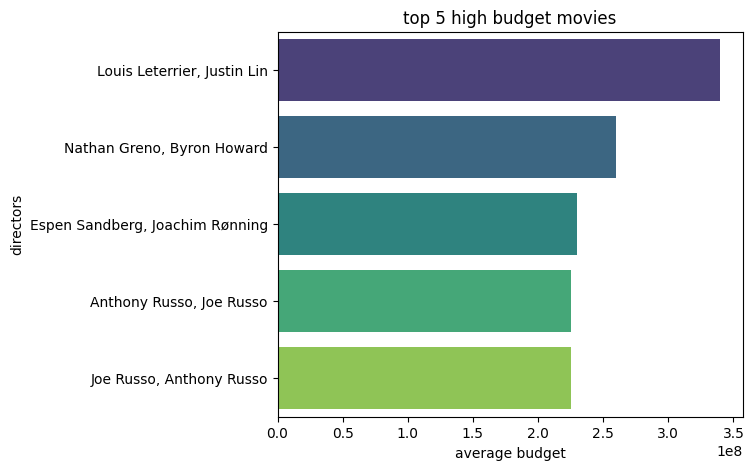

In [329]:
plt.figure(figsize=(6,5))
sns.barplot(y=top_budget_directors.index,x=top_budget_directors.values,palette="viridis")
plt.xlabel("average budget")
plt.title("top 5 high budget movies")


INSIGHTS

--Director A works with the highest budgets – Likely involved in large-scale productions with heavy VFX, star casts, or franchise films.

--Top 3 directors have similar budgets – Suggesting they consistently handle big projects.

--Significant budget drop after the top 2-3 – Indicates a clear difference in funding levels among directors.

--High budgets may correlate with blockbuster movies – These directors might be known for action, sci-fi, or fantasy genres.

--Spending ≠ Success – While high budgets allow for grand productions, they don't always guarantee top ratings or revenue.

**QUE 28)Are there any extreme outliers in budget ,gross revenue,or ratings?**

In [330]:
#draw subplot for 3 outliers in one plot

In [331]:
imdb.head(1)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold


Text(0.5, 1.0, 'rating outliers')

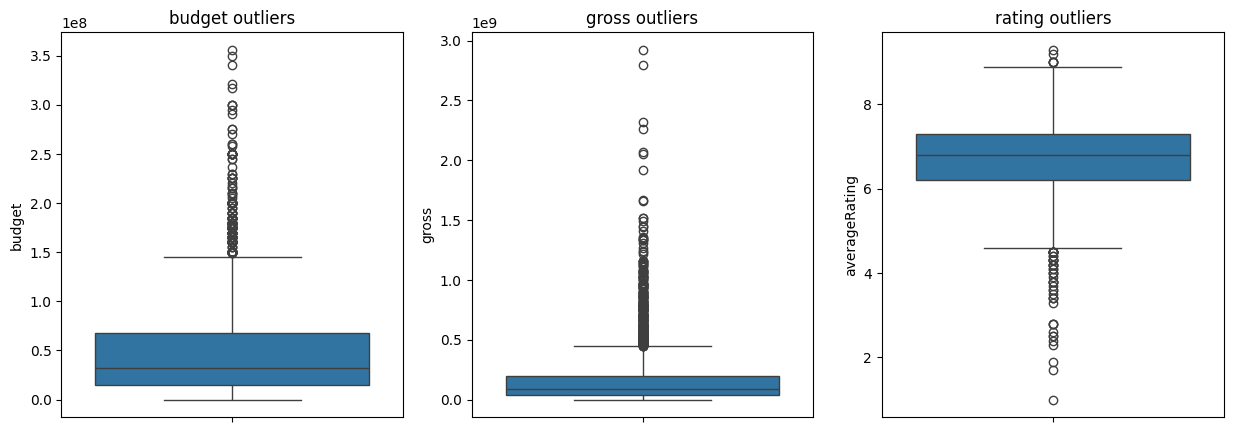

In [335]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

sns.boxplot(imdb['budget'])
plt.title("budget outliers")

plt.subplot(1,3,2)
sns.boxplot(imdb['gross'])
plt.title("gross outliers")

plt.subplot(1,3,3)
sns.boxplot(imdb['averageRating'])
plt.title("rating outliers")

INSIGHTS

--Budget Outliers:

A few movies have exceptionally high budgets, likely major blockbusters or franchise films.

Most films have relatively lower budgets, suggesting that big-budget films are rare.

--Gross Revenue Outliers:

Some movies have extremely high earnings, likely global hits or record-breaking blockbusters.

Many movies earn significantly less, indicating a wide gap between successful and underperforming films.

--Rating Outliers:

A few movies have exceptionally high ratings, suggesting cult classics or critically acclaimed masterpieces.

Very low-rated outliers exist, likely poorly received films or those with niche appeal.

**QUE 29) Do outliers in budget affect movie performance (gross) ?**

In [336]:
imdb.head(1)

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold


In [337]:
#draw scattered plot

Text(0.5, 1.0, 'Do outliers in budget affect movie performance (gross) ')

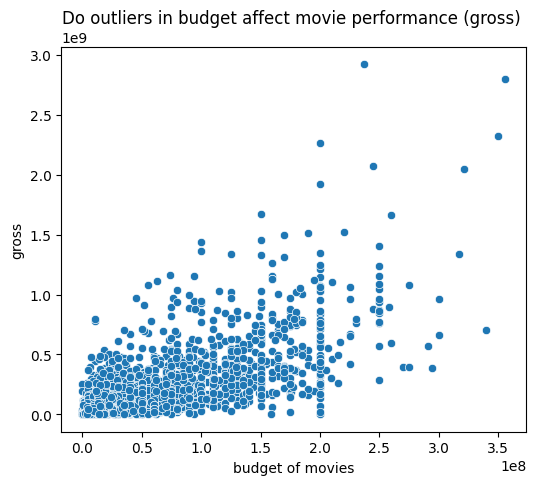

In [338]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=imdb['budget'],y=imdb["gross"])
plt.xlabel("budget of movies")
plt.title("outliers in budget affect movie performance (gross) ")

INSIGHTS

--Positive Correlation – Movies with higher budgets generally tend to have higher gross revenue, indicating that bigger investments often lead to bigger box office returns.

--Outliers Exist – Some movies with low budgets but high gross revenue (e.g., indie hits) and high budgets but low earnings (e.g., box office flops).

--Diminishing Returns – Beyond a certain budget, spending more doesn’t always guarantee significantly higher revenue.

--Blockbuster Effect – A few extremely high-budget movies dominate the gross revenue, likely major franchises or global hits.

--Risk vs. Reward – While higher budgets can lead to higher earnings, some expensive films still underperform, proving that content and marketing also play key roles.